In [100]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import PartialDependenceDisplay

from scipy.stats import spearmanr
from numpy.random import randn
from numpy.random import seed

from mlxtend import plotting

from sklearn.metrics import explained_variance_score, r2_score

import seaborn as sns

from sklearn.tree import (
    DecisionTreeRegressor,
    plot_tree
)
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn import preprocessing

from sklearn.metrics import make_scorer

# Data preperation

In [3]:
df = pd.read_csv('insurance.csv')
# df.describe()
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
525,18,female,33.880,0,no,southeast,11482.63485
1169,37,female,34.105,1,no,northwest,6112.35295
358,23,male,41.910,0,no,southeast,1837.28190
453,20,male,29.735,0,no,northwest,1769.53165
1272,43,male,25.520,5,no,southeast,14478.33015
957,24,male,26.790,1,no,northwest,12609.88702
295,18,male,22.990,0,no,northeast,1704.56810
138,54,female,31.900,3,no,southeast,27322.73386
140,34,male,22.420,2,no,northeast,27375.90478
254,50,male,31.825,0,yes,northeast,41097.16175


### category encoding
- sex
- region
- smoker

In [4]:
ohe_s = OneHotEncoder()
sex = ohe_s.fit_transform(df[['sex']])
sex=sex.toarray()
print(sex)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:
ohe_r = OneHotEncoder()
regions = ohe_r.fit_transform(df[['region']])
regions=regions.toarray()
print(regions)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [6]:
df[ohe_s.categories_[0][0]] = sex[:,0]
df[ohe_s.categories_[0][1]] = sex[:,1]
df[ohe_r.categories_[0][0]] = regions[:,0]
df[ohe_r.categories_[0][1]] = regions[:,1]
df[ohe_r.categories_[0][2]] = regions[:,2]
df[ohe_r.categories_[0][3]] = regions[:,3]


In [7]:
df['is_smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,1
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0
1334,18,female,31.920,0,no,northeast,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0
1336,21,female,25.800,0,no,southwest,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0


In [8]:
df_new = df
df_new=df_new.drop(columns=['sex', 'smoker','region'])
df_new

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
0,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0,1
1,18,33.770,1,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0,0
2,28,33.000,3,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0,0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0,0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,1.0,0.0,0.0,0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,0.0,0.0,0
1335,18,36.850,0,1629.83350,1.0,0.0,0.0,0.0,1.0,0.0,0
1336,21,25.800,0,2007.94500,1.0,0.0,0.0,0.0,0.0,1.0,0


In [9]:
corr_m = df_new.corr()
cr = corr_m.to_numpy()
corr_m

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210,0.787251
female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184,-0.076185
male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184,0.076185
northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177,0.002811
northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829,-0.036945
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265,0.068498
southwest,0.010016,-0.006205,0.021914,-0.043210,0.004184,-0.004184,-0.320177,-0.320829,-0.346265,1.000000,-0.036945


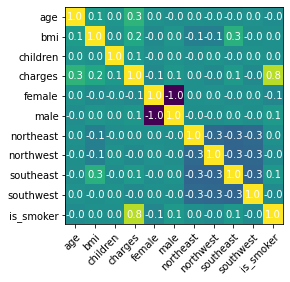

In [12]:
col_nam = df_new.columns
fig, ax = plt.subplots()
im = ax.imshow(cr)

ax.set_xticks(np.arange(len(col_nam)), labels=col_nam)
ax.set_yticks(np.arange(len(col_nam)), labels=col_nam)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(col_nam)):
    for j in range(len(col_nam)):
        text = ax.text(j, i, round(cr[i, j],1),
                       ha="center", va="center", color="w")

# fig.tight_layout()
plt.show()

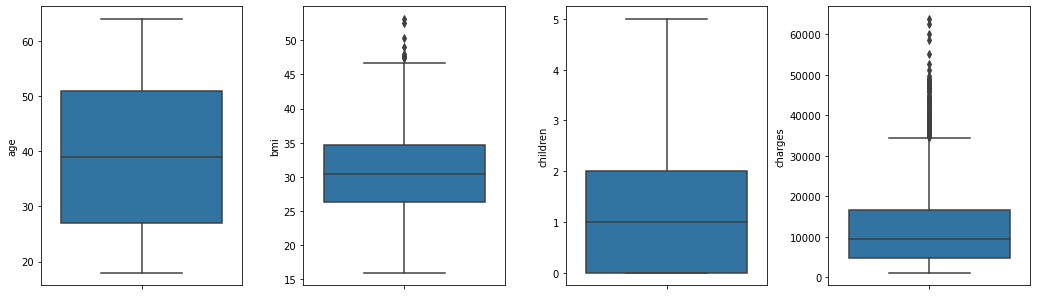

In [14]:
f, axes = plt.subplots(1, len(df_new.columns)-7,figsize=(15, 5))
f.tight_layout(pad=3.0)
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
for i in range(0,len(df_new.columns)-7):
    sns.boxplot(y=df_new[df_new.columns[i]], ax=axes[i])

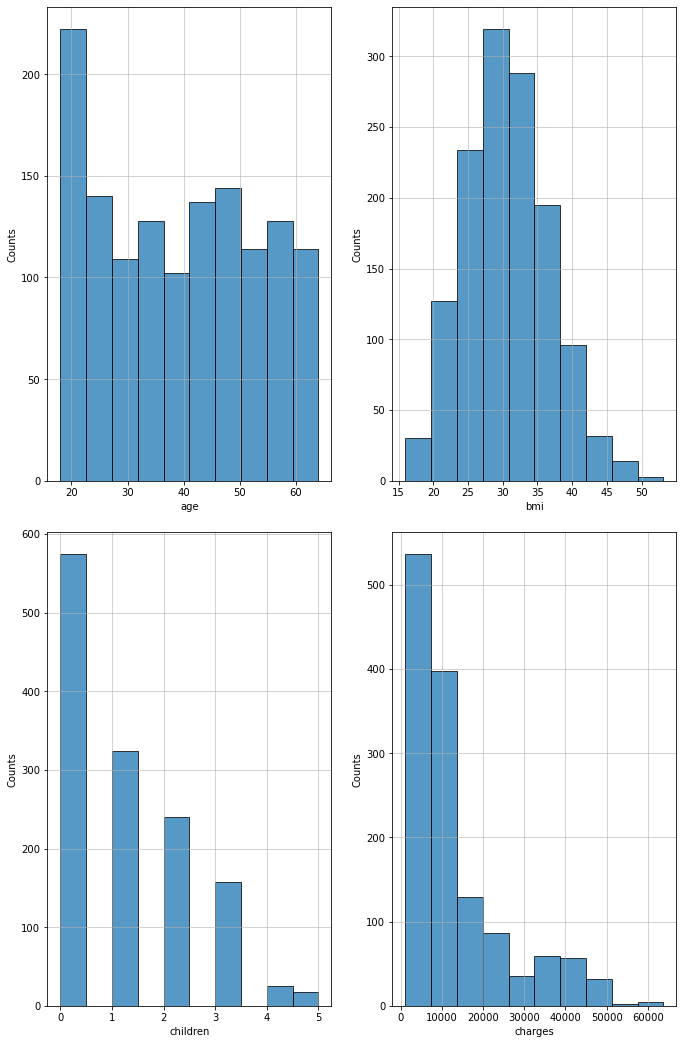

In [18]:
f, axes = plt.subplots(2, 2,figsize=(10, 15))
f.tight_layout(pad=3.0)

it=0
for i in range(0,2):
    for j in range(0,2):
        it+=1
        axes[i,j].hist(df_new[df_new.columns[it-1]],bins=10,alpha=0.75,edgecolor='black')
        axes[i,j].grid(True,alpha=0.7)
        axes[i,j].set(xlabel=df_new.columns[it-1], ylabel='Counts')

age          0
bmi          0
children     0
charges      0
female       0
male         0
northeast    0
northwest    0
southeast    0
southwest    0
is_smoker    0
dtype: int64

## Data Scaling

In [25]:
df_new.iloc[:,0:4]

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


array([[0.02173913, 0.3212268 , 0.        , 0.25161076],
       [0.        , 0.47914985, 0.2       , 0.00963595],
       [0.2173913 , 0.45843422, 0.6       , 0.05311516],
       ...,
       [0.        , 0.56201238, 0.        , 0.00810808],
       [0.06521739, 0.26472962, 0.        , 0.01414352],
       [0.93478261, 0.35270379, 0.        , 0.44724873]])

In [44]:
data_sc=df_new.iloc[:,0:4]
data_sc=data_sc.to_numpy()

scaler=MinMaxScaler()
scaler.fit(data_sc)

data_sca = scaler.transform(data_sc)
data_sca

data_sca
rest = df_new.iloc[:,4:].to_numpy()

df_data_sca = pd.DataFrame(np.hstack((data_sca,rest)),columns=df_new.columns)
df_data_sca

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1334,0.000000,0.429379,0.0,0.017305,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1335,0.000000,0.562012,0.0,0.008108,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,0.014144,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model

In [ ]:
target=df_new.pop("charges").values.ravel()
target=pd.Series(target,name='charges')
data = df_new

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.33, random_state=2)
regr = RandomForestRegressor(random_state=2)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Train score:', round(regr.score(X_train, y_train),4),
'\nTest score:', round(regr.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(regr, X_train, y_train, cv=5).mean(),4))


Train score: 0.9748 
Test score: 0.8653 
Cross-validation:  0.8177


## Parameters testing

### max_leaf_nodes-test

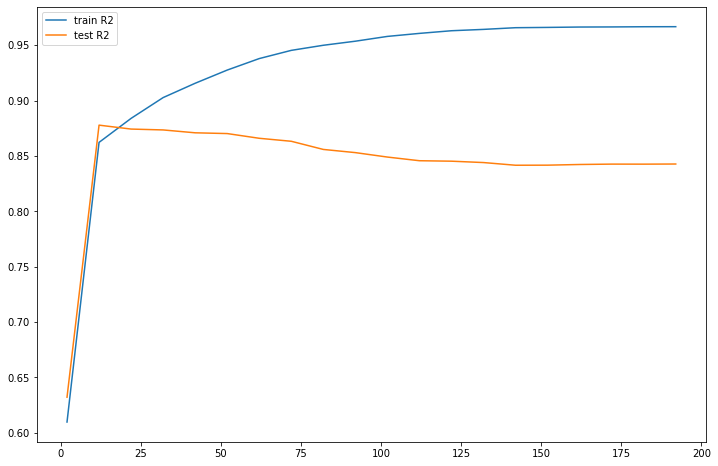

In [ ]:
max_leaf_nodes = list(range(2, 200, 10))
train_r2 = []
test_r2 = []

for param in max_leaf_nodes:
    model = RandomForestRegressor(n_estimators=10, max_leaf_nodes=param, random_state=1).fit(X_train, y_train)
    train_r2.append(model.score(X_train, y_train))
    test_r2.append(model.score(X_test, y_test))
    
plt.figure(figsize = (12, 8))
plt.plot(max_leaf_nodes, train_r2, label = 'train R2')
plt.plot(max_leaf_nodes, test_r2, label = 'test R2')
plt.legend()
plt.show()  

### max_leaf_nodes --->150

### Best parameters search

Exmple of GridSearch procedure 

In [ ]:
params = {'n_estimators': range(1,20,1),"min_samples_split": range(2, 10, 1),
          "min_samples_leaf": range(1, 10, 1)}
forest = RandomForestRegressor(max_leaf_nodes=150)

scorer = make_scorer(f1_score) #scoring object

rf_regressor_search = GridSearchCV(forest, params, cv=5,n_jobs=-1)
rf_regressor_search.fit(X_train, y_train)
rf_regressor_search.best_params_

{'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 12}

In [ ]:
forest = RandomForestRegressor(max_leaf_nodes=150,**rf_regressor_search.best_params_)
forest.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=150, min_samples_leaf=8,
                      min_samples_split=3, n_estimators=12)

In [ ]:
print('Train score:', round(forest.score(X_train, y_train),4),
'\nTest score:', round(forest.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(regr, X_train, y_train, cv=5).mean(),4))

Train score: 0.8845 
Test score: 0.879 
Cross-validation:  0.8177


After following case matrix (which took ~6h):
params = {'n_estimators': range(1,80,1),"min_samples_split": range(2, 100, 1),
          "min_samples_leaf": range(1, 100, 1)}

The best parameters are:
{'min_samples_leaf': 11, 'min_samples_split': 5, 'n_estimators': 19}




In [ ]:
best_fortest=RandomForestRegressor(max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19)
best_fortest.fit(X_train, y_train)
y_pred = best_fortest.predict(X_test)

In [ ]:
print('Train score:', round(best_fortest.score(X_train, y_train),4),
'\nTest score:', round(best_fortest.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(best_fortest, X_train, y_train, cv=5).mean(),4))

Train score: 0.8789 
Test score: 0.8818 
Cross-validation:  0.8375


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

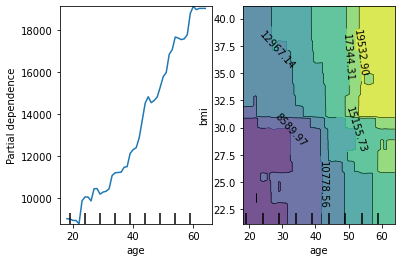

In [ ]:
disp1 = PartialDependenceDisplay.from_estimator(best_fortest, data,[0, (0, 1)])

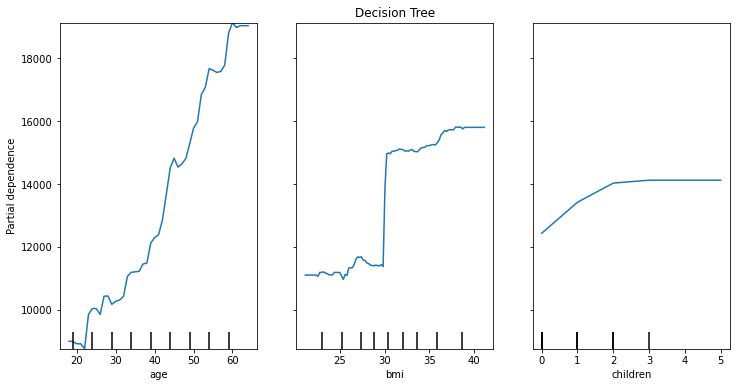

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(best_fortest, data, ["age", "bmi", 'children'], ax=ax)

## standardisation

In [45]:
# df_std=df_new
df_std=df_data_sca

In [46]:
std_col = ['age','bmi','children']
std_scale = preprocessing.StandardScaler().fit(df_data_sca[std_col])
df_std1=std_scale.transform(df_data_sca[std_col])

In [47]:
df_std1=pd.DataFrame(df_std1,columns=std_col)

In [48]:
df_std[std_col]=df_std1[std_col]
df_std.describe()

,age,bmi,children,charges,female,male,northeast,northwest,southeast,southwest,is_smoker
count,1.338000e+03,1.338000e+03,1.338000e+03,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,3.368838e-17,1.664090e-16,-2.738218e-17,0.193916,0.494768,0.505232,0.242152,0.242900,0.272048,0.242900,0.204783
std,1.000374e+00,1.000374e+00,1.000374e+00,0.193301,0.500160,0.500160,0.428546,0.428995,0.445181,0.428995,0.403694
min,-1.509965e+00,-2.412011e+00,-9.086137e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01,0.057757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02,0.131849,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.396738e-01,6.611572e-01,7.510793e-01,0.247700,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.765289e+00,3.685522e+00,3.240619e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [67]:
data1 = df_std
target_col='charges'
data1=data1.drop(columns=target_col)

# target1=pd.Series(target,name=target_col)
target1=df_std[target_col]
X_train, X_test, y_train, y_test = train_test_split(data1, target1,test_size=0.33, random_state=2)

# best_p=[max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19,random_state=2]
RF_std = RandomForestRegressor(max_leaf_nodes=150,min_samples_leaf=11, min_samples_split=5, n_estimators=19,random_state=2)
RF_std.fit(X_train, y_train)
y_pred = RF_std.predict(X_test)

print('Train score:', round(RF_std.score(X_train, y_train),4),
'\nTest score:', round(RF_std.score(X_test, y_test),4),
'\nCross-validation: ', round(cross_val_score(RF_std, X_train, y_train, cv=5).mean(),4))

Train score: 0.8806 
Test score: 0.8798 
Cross-validation:  0.8391


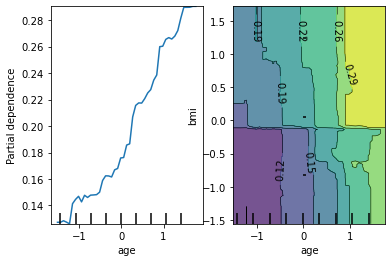

In [70]:
disp1 = PartialDependenceDisplay.from_estimator(RF_std, data1,[0, (0, 1)])

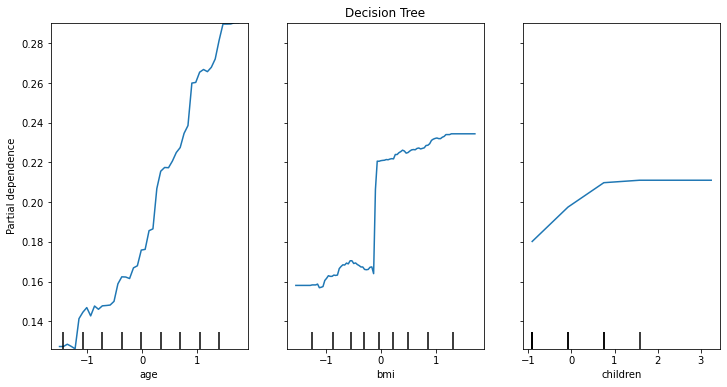

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(RF_std, data1, ["age", "bmi",'children'], ax=ax)

In [72]:
RF_std.feature_importances_

array([1.18903347e-01, 1.73413834e-01, 1.22083393e-02, 5.54478851e-04,
       9.09878915e-04, 3.08709628e-03, 1.03075223e-03, 6.09567152e-04,
       6.19433296e-04, 6.88663273e-01])

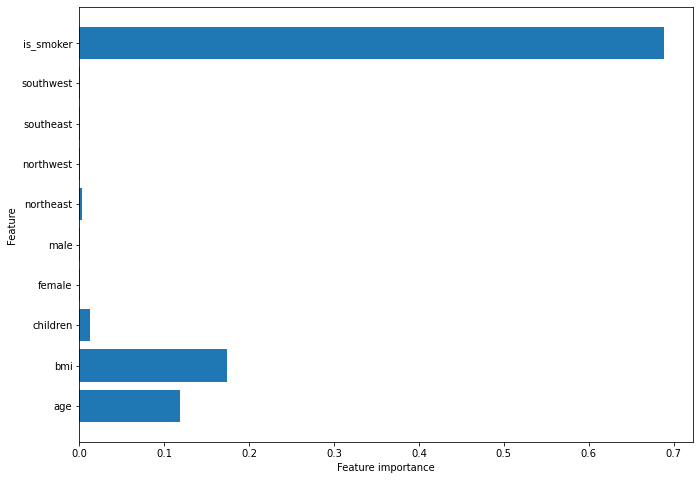

In [73]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize = (11, 8))
    n_features = data1.shape[1]
    plt.barh(range(n_features), RF_std.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data1.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(RF_std)

## Metrics

In [107]:
y_pred = RF_std.predict(X_test)

r2_score(y_test, y_pred)
explained_variance_score(y_test, y_pred)

print('R2 Score:',round(r2_score(y_test, y_pred),4),'\nExplained Variance Score',round(explained_variance_score(y_test, y_pred),4))

R2 Score: 0.8798 
Explained Variance Score 0.8798


In [98]:

explained_variance_score(y_test, y_pred)


0.8797708804800947

In [90]:
 r2_score(y_test, y_pred)

0.8797699957510544